## Expenditure

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


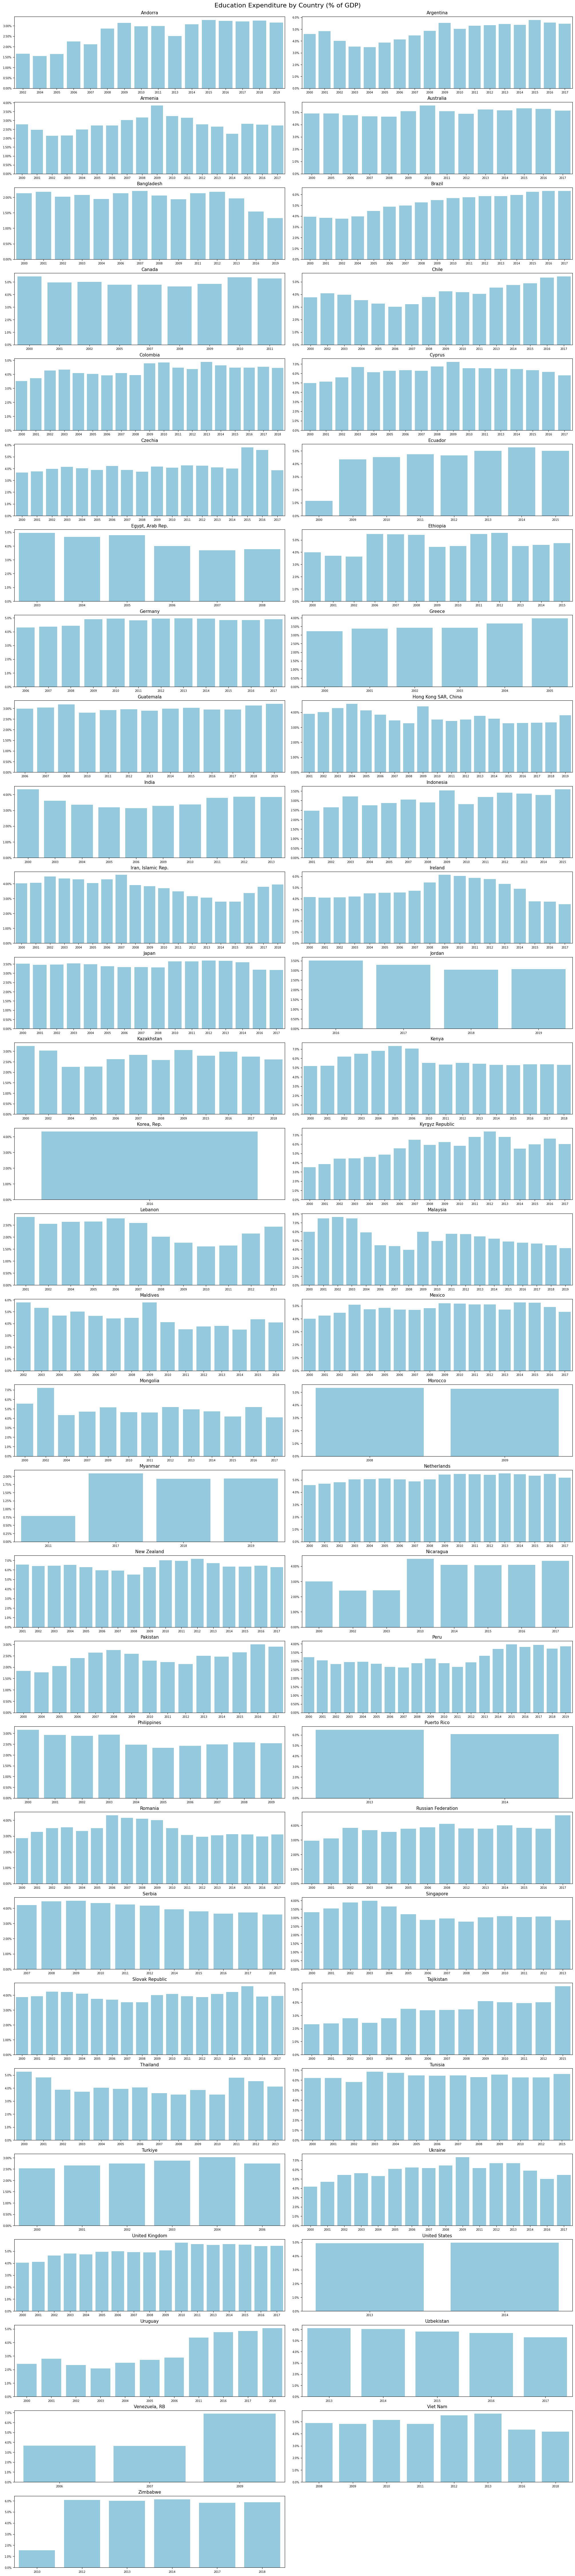

In [3]:
##BAR CHART FOR EVERY COUNTRY
# Load and clean
df_edu = pd.read_csv("../data/processed/Education_expenditure_clean.csv")
df_clean = df_edu.dropna(subset=["Education_perGDP"])

# Filter countries with enough data (optional)
countries = sorted(df_clean["Country"].unique())
num_countries = len(countries)

# Set layout
cols = 2  
rows = -(-num_countries // cols)  
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3), constrained_layout=True)

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot
for i, country in enumerate(countries):
    df_country = df_clean[df_clean["Country"] == country]
    ax = axes[i]

    sns.barplot(data=df_country, x="Year", y="Education_perGDP", color="skyblue", ax=ax)
    ax.set_title(country, fontsize=11)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(labelsize=7)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Hide unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Education Expenditure by Country (% of GDP)", fontsize=16)
plt.show()


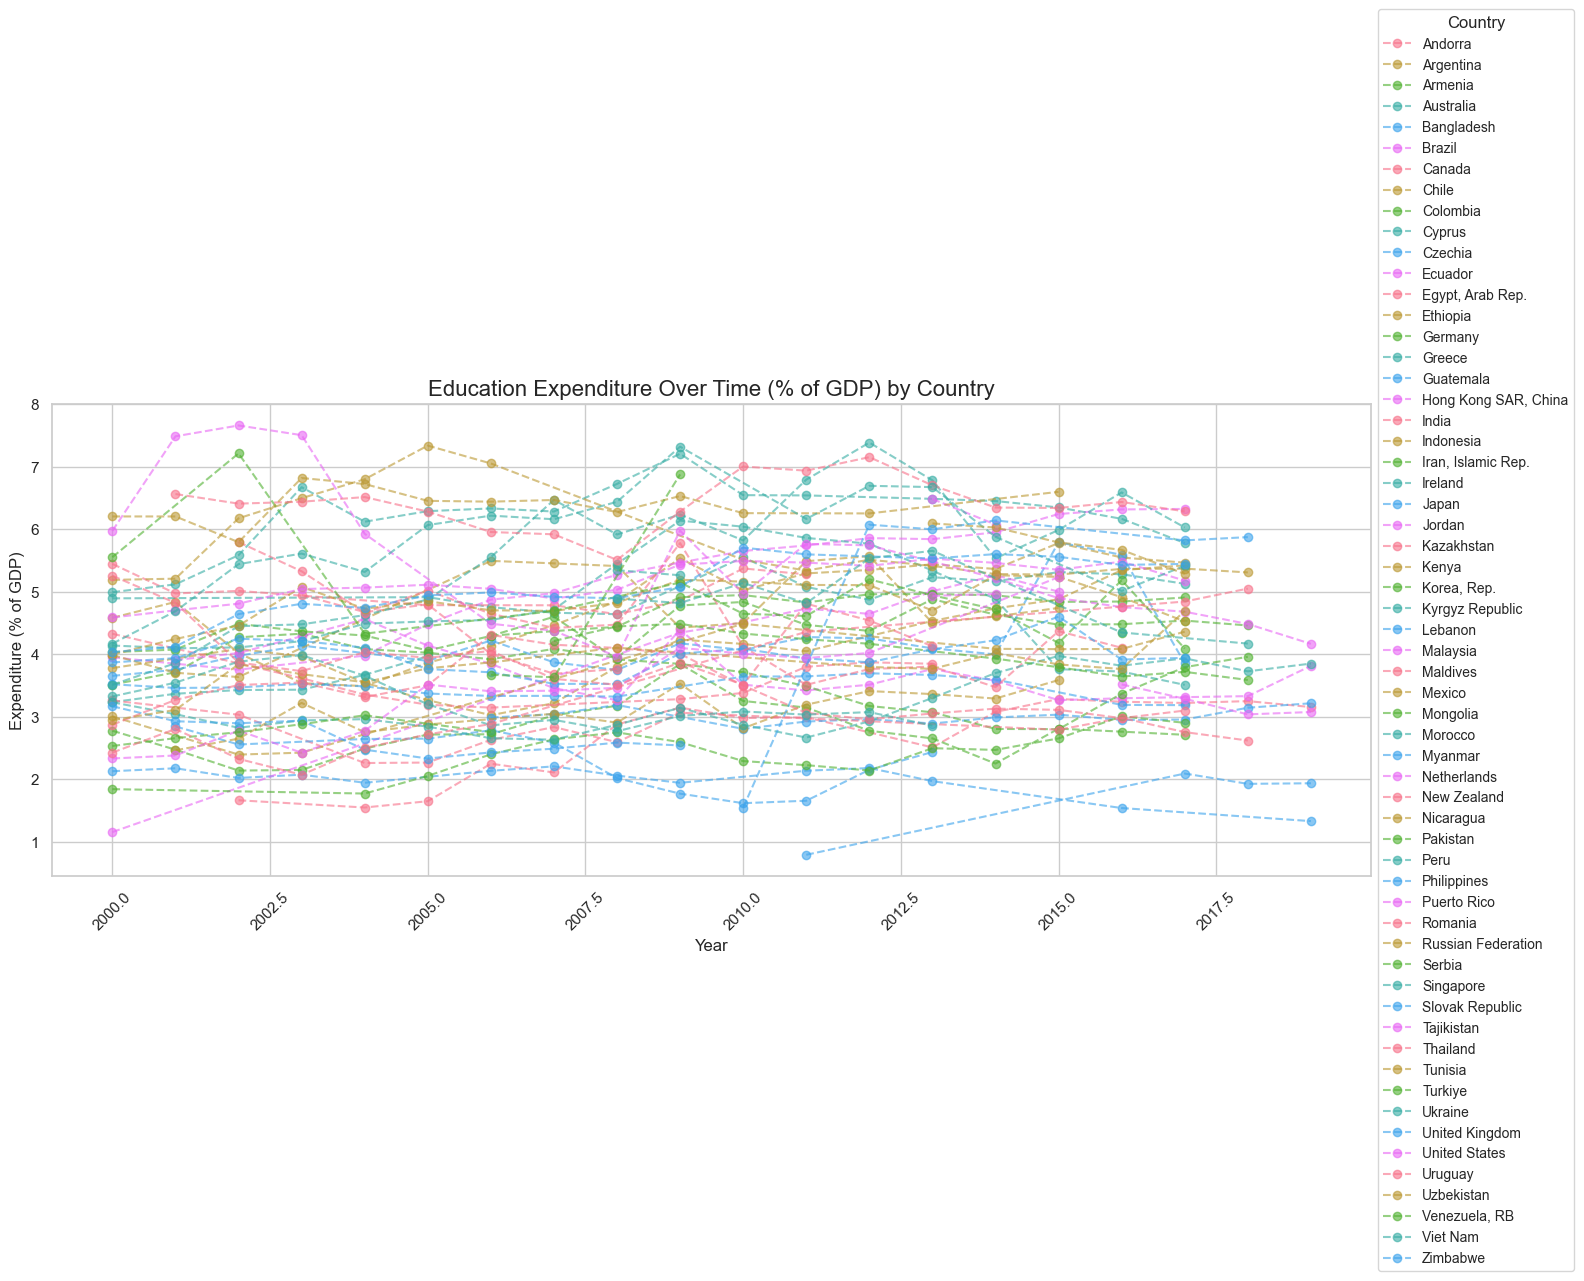

In [4]:
## DOTTED LINE CHART FOR ALL COUNTRIES

# Load and clean the data
df_edu = pd.read_csv("../data/processed/Education_expenditure_clean.csv")
df_clean = df_edu.dropna(subset=["Education_perGDP"])

# Apply Seaborn styling
sns.set_theme(style="whitegrid", palette="husl")

# Set figure
plt.figure(figsize=(16, 10))

# Plot one line per country
for country in sorted(df_clean["Country"].unique()):
    df_country = df_clean[df_clean["Country"] == country]
    if df_country.empty:
        continue
    plt.plot(df_country["Year"], df_country["Education_perGDP"],
             linestyle="--", marker="o", alpha=0.6, label=country)

# Labels and title
plt.title("Education Expenditure Over Time (% of GDP) by Country", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Expenditure (% of GDP)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Show legend outside
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize='small', ncol=1, title="Country")
plt.tight_layout()
plt.show()


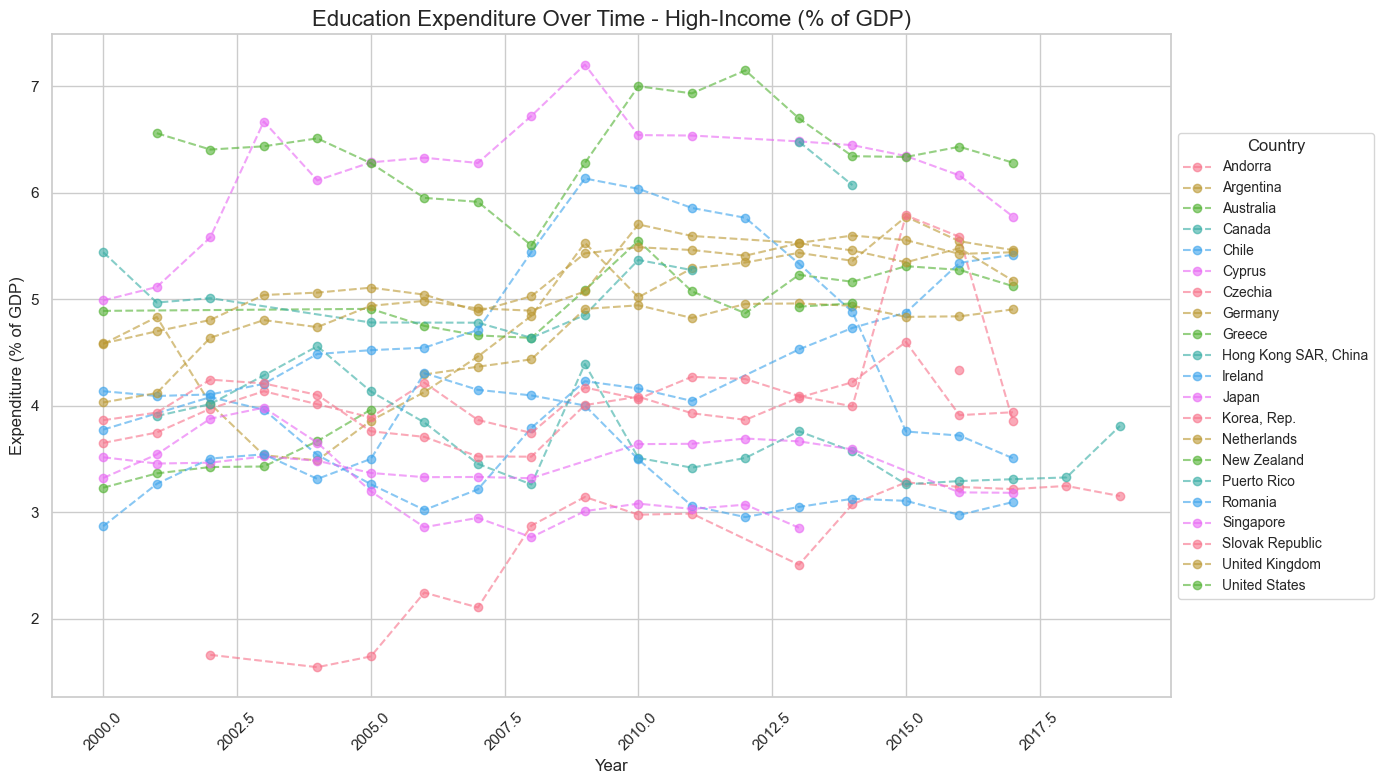

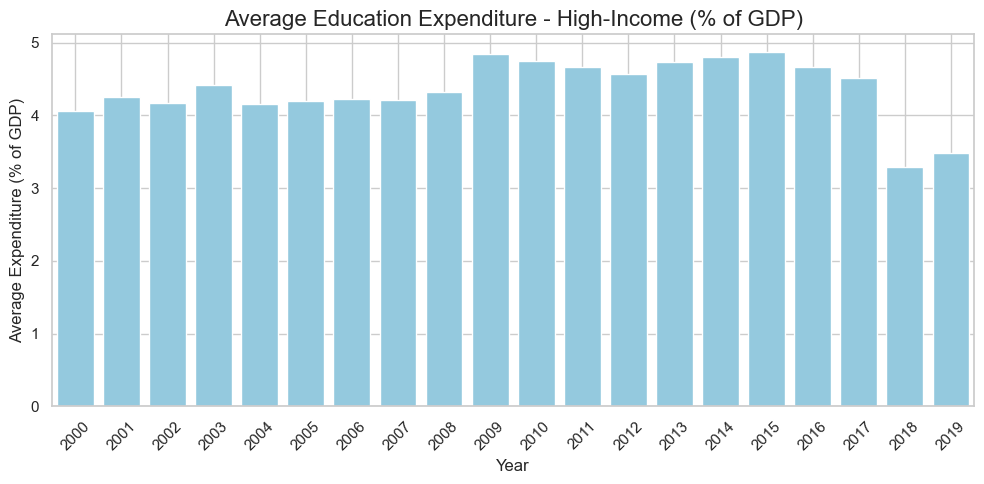

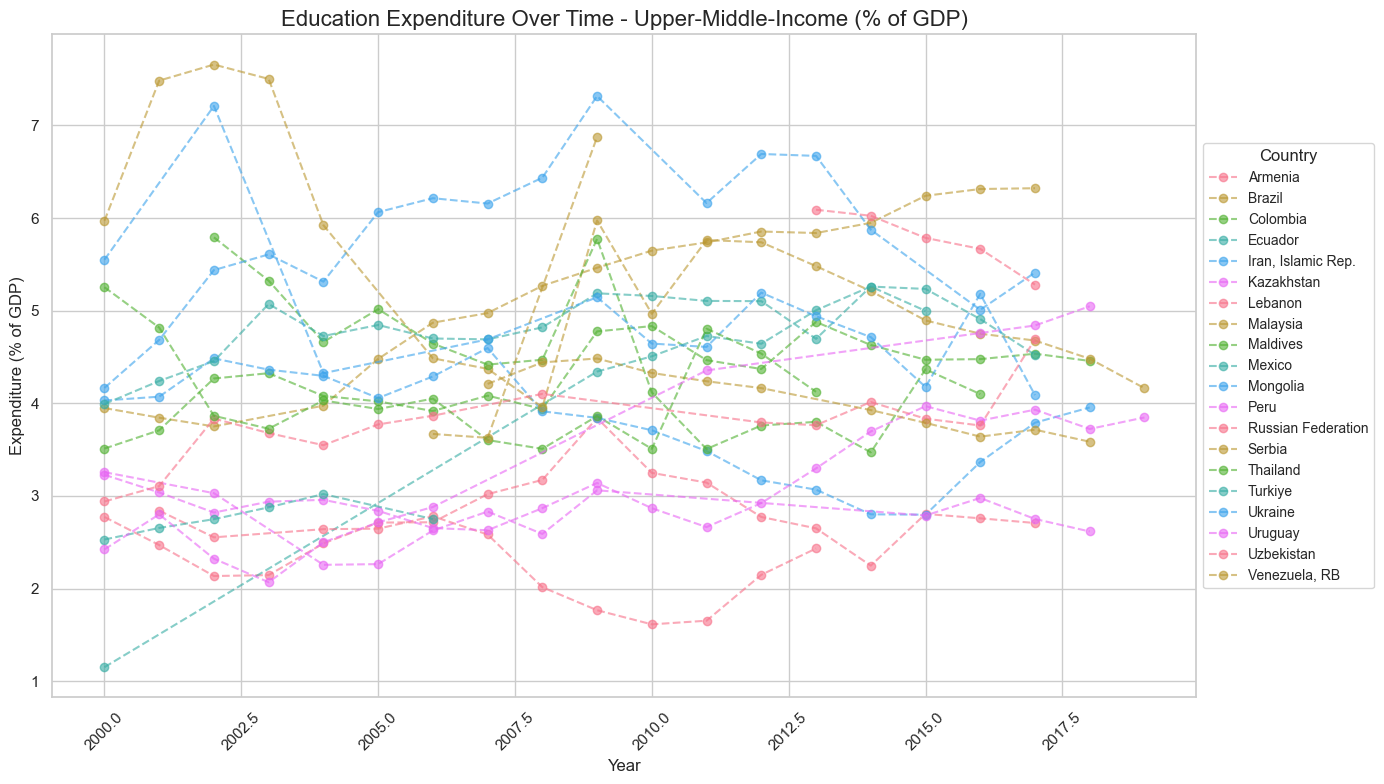

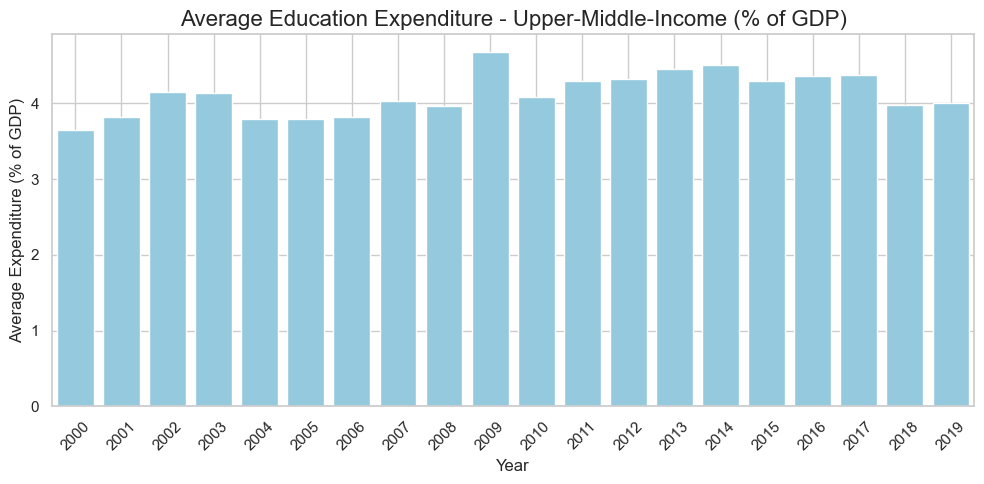

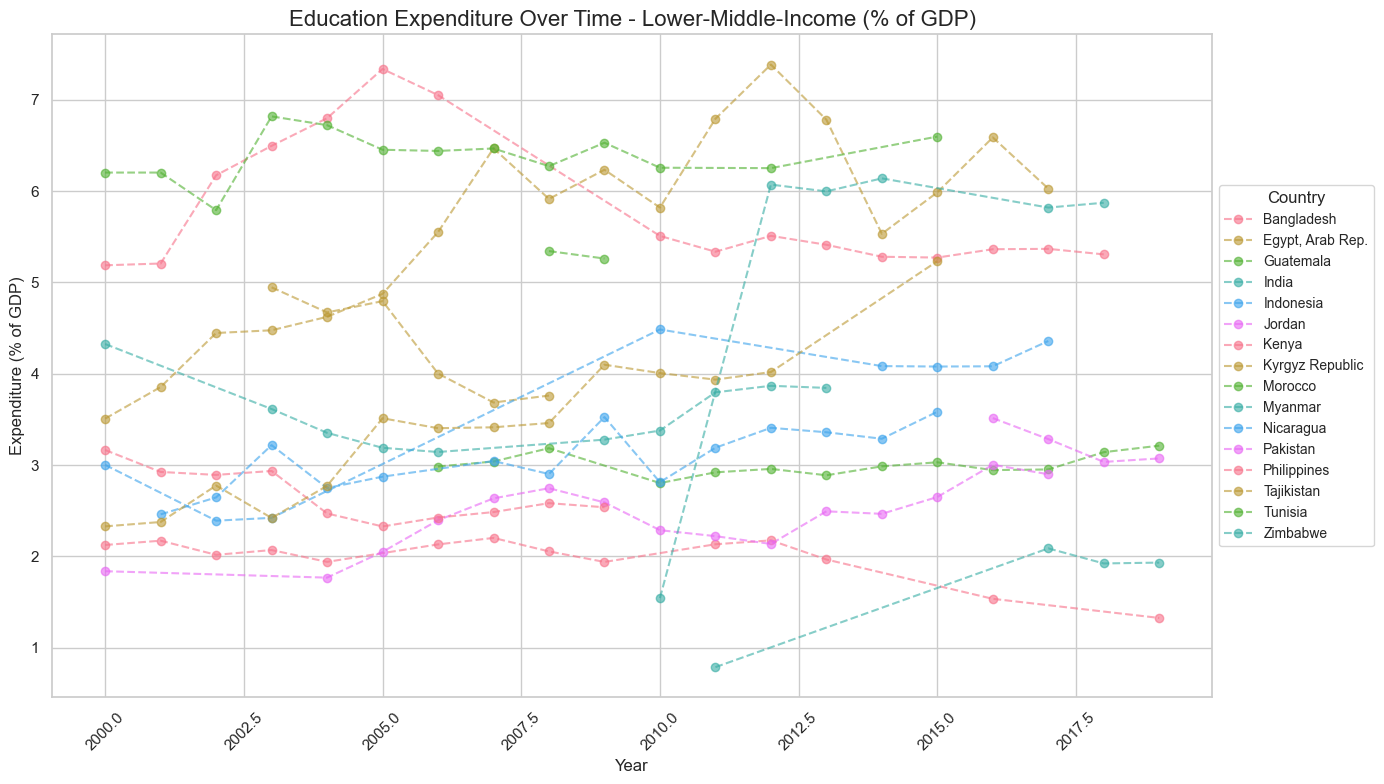

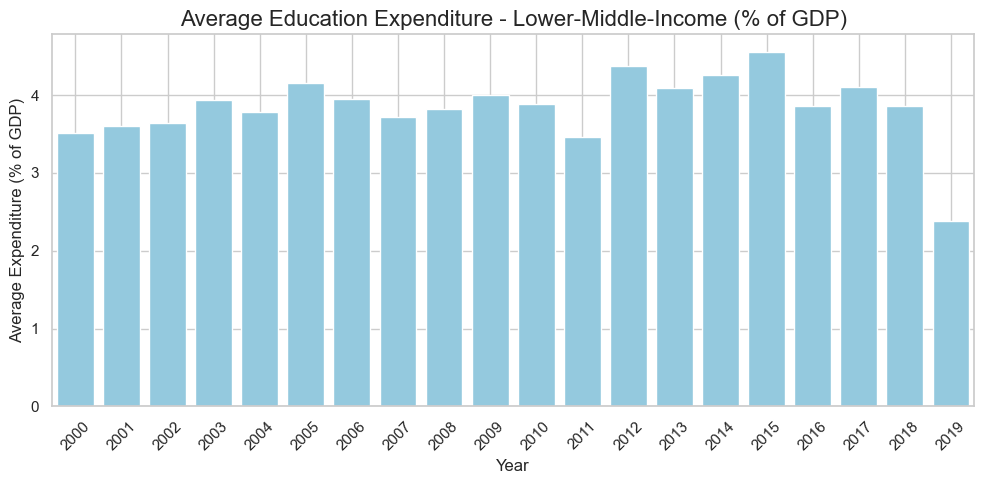

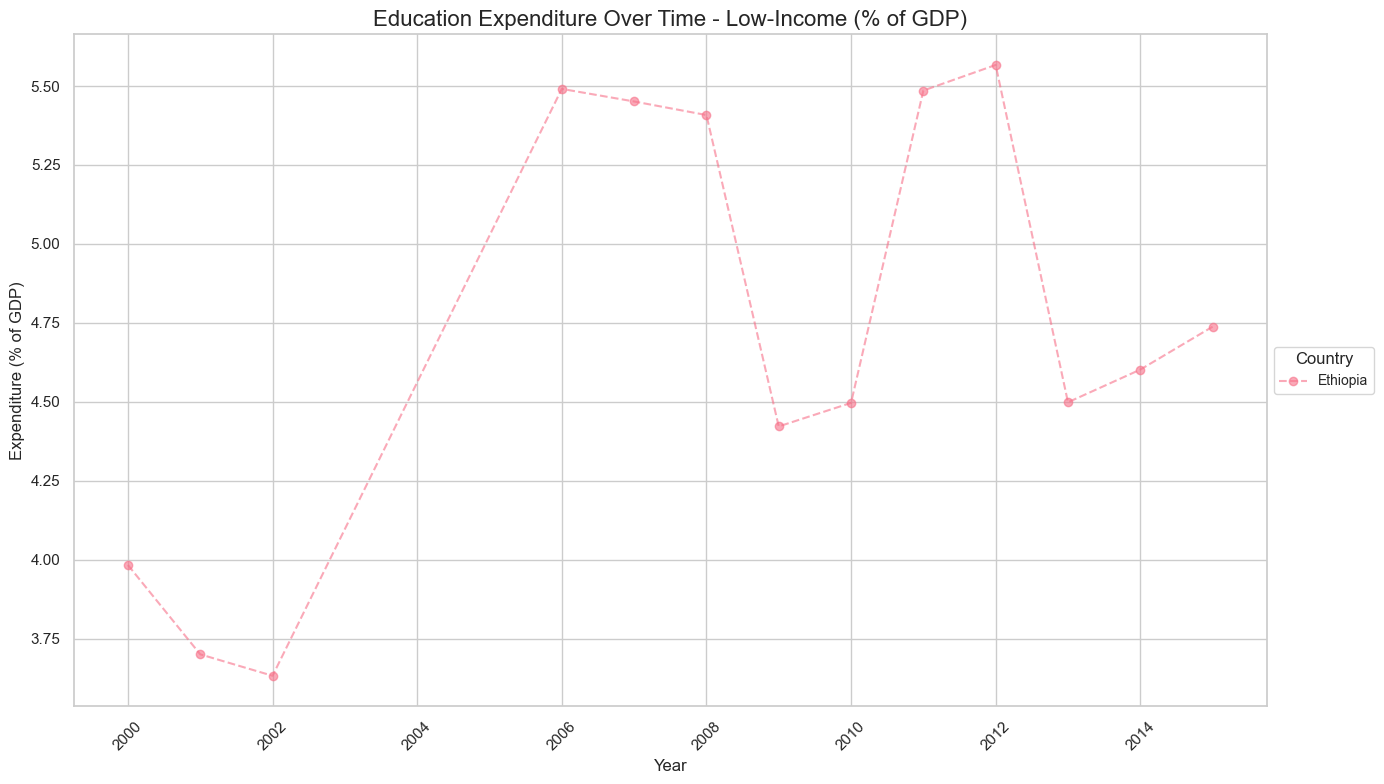

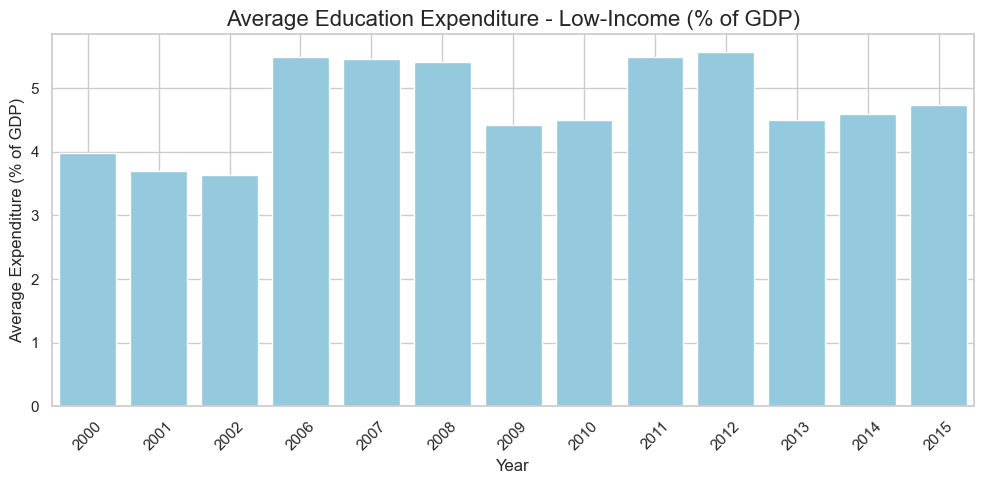

In [6]:
## DOTTED LINE CHART FOR COUNTRIES WITH SAME INCOME CATEGORIES

# Load and clean the dataset
df_edu = pd.read_csv("../data/processed/Education_expenditure_clean.csv")
df_clean = df_edu.dropna(subset=["Education_perGDP"])

# Define income categories
high_income = [
    "Andorra", "Argentina", "Australia", "Canada", "Chile", "Cyprus", "Czechia", "Germany", "Greece",
    "Hong Kong SAR, China", "Ireland", "Japan", "Korea, Rep.", "Netherlands", "New Zealand",
    "Puerto Rico", "Romania", "Singapore", "Slovak Republic", "United Kingdom", "United States"
]

upper_middle_income = [
    "Armenia", "Brazil", "Colombia", "Ecuador", "Iran, Islamic Rep.", "Kazakhstan", "Lebanon", "Malaysia",
    "Maldives", "Mexico", "Mongolia", "Peru", "Russian Federation", "Serbia", "Thailand", "Turkiye",
    "Ukraine", "Uruguay", "Uzbekistan", "Venezuela, RB"
]

lower_middle_income = [
    "Bangladesh", "Egypt, Arab Rep.", "Guatemala", "India", "Indonesia", "Jordan", "Kenya",
    "Kyrgyz Republic", "Morocco", "Myanmar", "Nicaragua", "Pakistan", "Philippines",
    "Tajikistan", "Tunisia", "Vietnam", "Zimbabwe"
]

low_income = ["Ethiopia"]

# Create dictionary
income_groups = {
    "High-Income": high_income,
    "Upper-Middle-Income": upper_middle_income,
    "Lower-Middle-Income": lower_middle_income,
    "Low-Income": low_income
}

# Set consistent palette
sns.set_palette("husl")

# Loop in the desired order
for group_name, country_list in income_groups.items():
    df_group = df_clean[df_clean["Country"].isin(country_list)]

    # ========= Dotted Chart (each country line) =========
    plt.figure(figsize=(14, 8))
    for country in sorted(df_group["Country"].unique()):
        df_country = df_group[df_group["Country"] == country]
        if df_country.empty:
            continue
        plt.plot(df_country["Year"], df_country["Education_perGDP"],
                 linestyle="--", marker="o", alpha=0.6, label=country)
    plt.title(f"Education Expenditure Over Time - {group_name} (% of GDP)", fontsize=16)
    plt.xlabel("Year")
    plt.ylabel("Expenditure (% of GDP)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5), fontsize="small", title="Country")
    plt.tight_layout()
    plt.show()

    # ========= Bar Chart (average for group) =========
    df_avg = df_group.groupby("Year")["Education_perGDP"].mean().reset_index()
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df_avg, x="Year", y="Education_perGDP", color="skyblue")
    plt.title(f"Average Education Expenditure - {group_name} (% of GDP)", fontsize=16)
    plt.xlabel("Year")
    plt.ylabel("Average Expenditure (% of GDP)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
